# Trabajo Práctico Datos (75.06) - Análisis exploratorio de datos


El objetivo del primer TP es realizar un análisis exploratorio del set de datos del TP. Queremos ver qué cosas podemos descubrir sobre los datos que puedan resultar interesantes. Los requisitos de la primera entrega son los siguientes:

- El análisis debe estar hecho en R o Python Pandas.
- El análisis debe entregarse en formato papel en una carpeta en donde se incluya el reporte completo y todas las visualizaciones generadas. Es altamente recomendable que las visualizaciones se impriman en color.
- Informar el link a un repositorio Github en donde pueda bajarse el código completo para generar el análisis.
- Agregar en Kaggle un kernel con el análisis exploratorio realizado.

La evaluación del TP se realizará en base al siguiente criterio:

- Originalidad del análisis exploratorio. 
- Calidad del reporte. ¿Está bien escrito? ¿Es claro y preciso? 
- Calidad del análisis exploratorio: qué tipo de preguntas se hacen y de qué forma se responden, ¿es la respuesta clara y concisa con respecto a la pregunta formulada? 
- Calidad de las visualizaciones presentadas.
- ¿Tienen todos los ejes su rótulo?
- ¿Tiene cada visualización un título?
- ¿Es entendible la visualización sin tener que leer la explicación?
- ¿El tipo de plot elegido es adecuado para lo que se quiere visualizar?
- ¿Es una visualización interesante?
- ¿El uso del color es adecuado?
- ¿Hay un exceso o falta de elementos visuales en la visualización elegida?
- ¿La visualización es consistente con los datos?
- Conclusiones presentadas.
- ¿Presenta el grupo un listado de "insights" aprendidos sobre los datos en base al análisis realizado? ¿Es interesante? ¿Descubrieron cosas que pueden ser de interés las personas que estén pensando en realizar alguna operación inmobiliaria, o a empresa Properati?


In [2]:
import numpy as np 
import pandas as pd

# plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.patches as mpatches

import calendar

### Carga de archivos:

In [8]:
#Carga de datos 2017
filenames_2017 = ['properties/properati-AR-2017-01-01-properties-sell.csv',
                 'properties/properati-AR-2017-02-01-properties-sell.csv',
                 'properties/properati-AR-2017-03-01-properties-sell.csv',
                 'properties/properati-AR-2017-04-01-properties-sell.csv',
                 'properties/properati-AR-2017-05-01-properties-sell.csv',
                 'properties/properati-AR-2017-06-01-properties-sell.csv',
                 'properties/properati-AR-2017-07-01-properties-sell.csv']

dataframes_2017 = []
for filename in filenames_2017:
    dataframes_2017.append(pd.read_csv(filename))
    
data_2017 = pd.DataFrame()
for dataframe in dataframes_2017:
    data_2017 = pd.concat([data_2017, dataframe]).drop_duplicates().reset_index(drop=True)
    
#Carga de datos 2016
filenames_2016 = ['properties/properati-AR-2016-01-01-properties-sell.csv', 
            'properties/properati-AR-2016-02-01-properties-sell.csv',
            'properties/properati-AR-2016-03-01-properties-sell.csv',
            'properties/properati-AR-2016-04-01-properties-sell.csv',
            'properties/properati-AR-2016-05-01-properties-sell.csv',
            'properties/properati-AR-2016-06-01-properties-sell.csv',
            'properties/properati-AR-2016-07-01-properties-sell.csv',
            'properties/properati-AR-2016-08-01-properties-sell.csv',
            'properties/properati-AR-2016-09-01-properties-sell.csv',
            'properties/properati-AR-2016-10-01-properties-sell.csv',
            'properties/properati-AR-2016-11-01-properties-sell.csv',
            'properties/properati-AR-2016-12-01-properties-sell.csv']

dataframes_2016 = []
for filename in filenames_2016:
    dataframes_2016.append(pd.read_csv(filename))

data_2016 = pd.DataFrame()
for dataframe in dataframes_2016:
    data_2016 = pd.concat([data_2016, dataframe]).drop_duplicates().reset_index(drop=True)

#Primer y segundo semestre de 2016
psem_2016 = pd.DataFrame()
for x in range(0,6):
    psem_2016 = pd.concat([psem_2016, dataframes_2016[x]]).drop_duplicates().reset_index(drop=True)
    
ssem_2016 = pd.DataFrame()
for x in range(6,12):
    ssem_2016 = pd.concat([ssem_2016, dataframes_2016[x]]).drop_duplicates().reset_index(drop=True)
    
#Primer y Segundo Semestre de 2015
psem_2015 = pd.read_csv('properties/properati-AR-2015-06-01-properties-sell-six_months.csv')
ssem_2015 = pd.read_csv('properties/properati-AR-2015-12-01-properties-sell-six_months.csv')
#Primer y Segundo Semestre de 2014
psem_2014 = pd.read_csv('properties/properati-AR-2014-07-01-properties-sell.csv')
ssem_2014 = pd.read_csv('properties/properati-AR-2015-01-01-properties-sell-six_months.csv')

dataset = pd.concat([data_2017, data_2016, psem_2015, ssem_2015, psem_2014, ssem_2014]).drop_duplicates('properati_url').reset_index(drop=True)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340843 entries, 0 to 340842
Data columns (total 28 columns):
country_name                  284004 non-null object
created_on                    340843 non-null object
currency                      285528 non-null object
description                   283987 non-null object
expenses                      24548 non-null float64
floor                         46468 non-null float64
geonames_id                   290946 non-null float64
id                            284004 non-null object
image_thumbnail               333992 non-null object
lat                           274848 non-null float64
lat-lon                       274848 non-null object
lon                           274848 non-null float64
operation                     340843 non-null object
place_name                    340804 non-null object
place_with_parent_names       340843 non-null object
price                         302565 non-null float64
price_aprox_local_currency    302563 

## Análisis de 2016 y 2017.
O los combinamos o van uno atrás del otro


# ¿Cómo varía la cantidad de publicaciones a lo largo del año?
## ¿Cómo varía para cada uno de los meses? ¿Y para cada una de las estaciones? 

In [10]:
dataset['date'] = pd.to_datetime(dataset['created_on'])
dataset['año'] = dataset['date'].map(lambda x:x.year)
dataset['mes'] = dataset['date'].map(lambda x:x.month)

cant_por_mes = dataset.loc[:, ['año', 'mes']].groupby(['mes']).agg([np.size])
cant_por_mes = cant_por_mes.rename(columns={'año': 'size'})

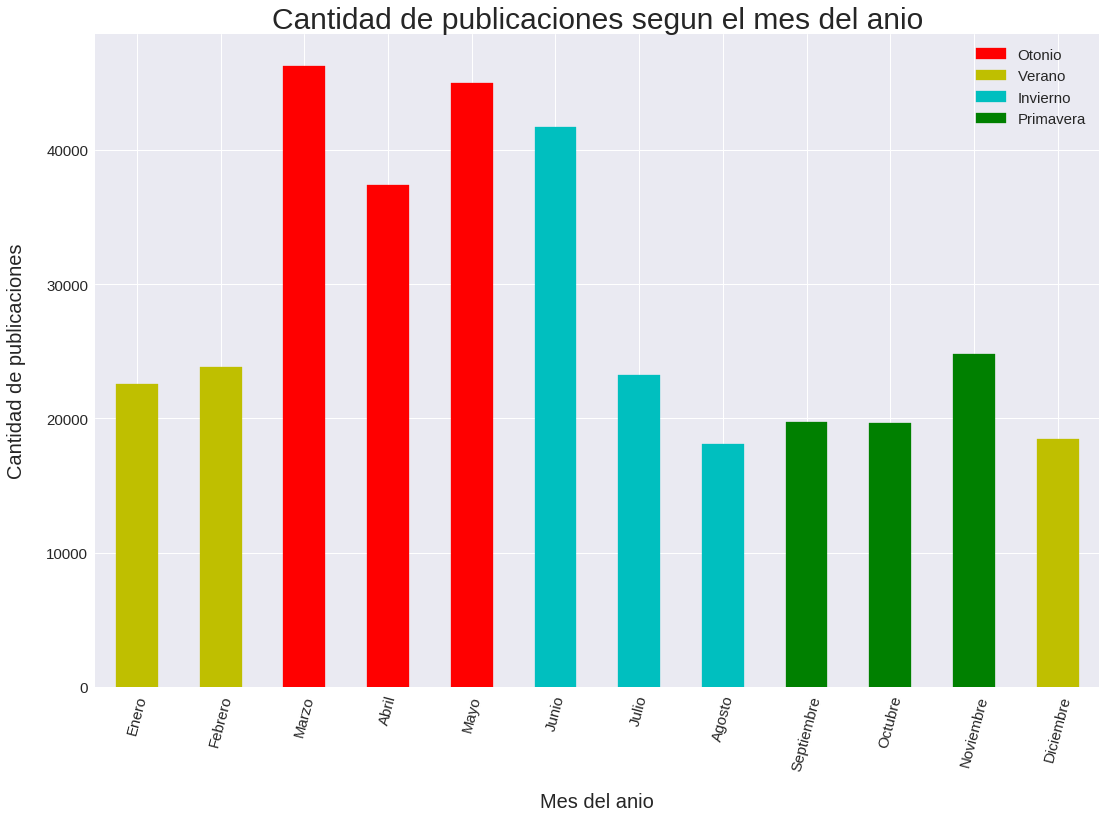

In [20]:
f= plt.figure()
ax = cant_por_mes['size'].plot(kind='bar', rot=75, figsize=(18,12), ax=f.gca())
ax.set_ylabel('Cantidad de publicaciones',size=20.0,labelpad=20.0);
ax.set_xlabel('Mes del anio',size=20.0,labelpad=20.0);
ax.set_title('Cantidad de publicaciones segun el mes del anio',size=30.0)
#color para cada estación del año
yellow_patch = mpatches.Patch(color='y', label='Verano')
red_patch = mpatches.Patch(color='r', label='Otonio')
cyan_patch = mpatches.Patch(color='c', label='Invierno')
green_patch = mpatches.Patch(color='g', label='Primavera')
plt.legend(handles=[red_patch,yellow_patch,cyan_patch,green_patch], prop={'size': 15.0})
#coloreo cada columna según la estación del año
ax.get_children()[0].set_color('y');ax.get_children()[1].set_color('y');ax.get_children()[2].set_color('r')
ax.get_children()[3].set_color('r');ax.get_children()[4].set_color('r');ax.get_children()[5].set_color('c')
ax.get_children()[6].set_color('c');ax.get_children()[7].set_color('c');ax.get_children()[8].set_color('g')
ax.get_children()[9].set_color('g');ax.get_children()[10].set_color('g');ax.get_children()[11].set_color('y')

ax.set_xticklabels(['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre',\
                    'Octubre','Noviembre','Diciembre'], size= 15.0)
plt.yticks(size = 15)
plt.show()


Podemos observar que en los meses de Marzo y Mayo se da la mayor concentración de publicaciones creadas, seguidos por Junio y Abril. Por otro lado, Agosto y Diciembre son los meses en los que se crearon menor cantidad de publicaciones.
Refiriéndonos a las estaciones meteorológicas del año, entonces podríamos mencionar al Otoño como la estación del año que tiene mayor tendencia a la publicación de inmuebles.

## Progreso de los precios: ¿las propiedades en el AMBA están encareciendo?

In [49]:
#En principio, reduzco el set de datos a registros de capital federal + GBA
dataset_red = dataset
dataset_red.dropna(subset=['state_name'], inplace=True)
dataset_red = dataset_red.loc[(dataset_red.state_name.str.contains('G.B.A|Capital Federal'))\
                   , ['state_name', 'created_on', 'price_usd_per_m2', 'place_name']]
dataset_red.dropna(inplace=True)
dataset_red['date'] = pd.to_datetime(dataset_red['created_on'])
dataset_red['año'] = dataset_red['date'].map(lambda x:x.year)

In [50]:
dataset_red.head(10)

,state_name,created_on,price_usd_per_m2,place_name,date,año
12,Bs.As. G.B.A. Zona Sur,2016-07-01,2368.421053,Lomas de Zamora,2016-07-01,2016
13,Bs.As. G.B.A. Zona Sur,2016-07-01,1301.587302,Banfield,2016-07-01,2016
15,Bs.As. G.B.A. Zona Oeste,2016-07-01,659.090909,San Justo,2016-07-01,2016
16,Bs.As. G.B.A. Zona Oeste,2016-07-01,1576.271186,San Justo,2016-07-01,2016
17,Bs.As. G.B.A. Zona Oeste,2016-07-01,1576.271186,San Justo,2016-07-01,2016
18,Bs.As. G.B.A. Zona Oeste,2016-07-01,1576.271186,San Justo,2016-07-01,2016
19,Bs.As. G.B.A. Zona Oeste,2016-07-01,1576.271186,San Justo,2016-07-01,2016
20,Bs.As. G.B.A. Zona Oeste,2016-07-01,1690.909091,San Justo,2016-07-01,2016
21,Bs.As. G.B.A. Zona Oeste,2016-07-01,1690.909091,San Justo,2016-07-01,2016
22,Bs.As. G.B.A. Zona Oeste,2016-07-01,1690.909091,San Justo,2016-07-01,2016


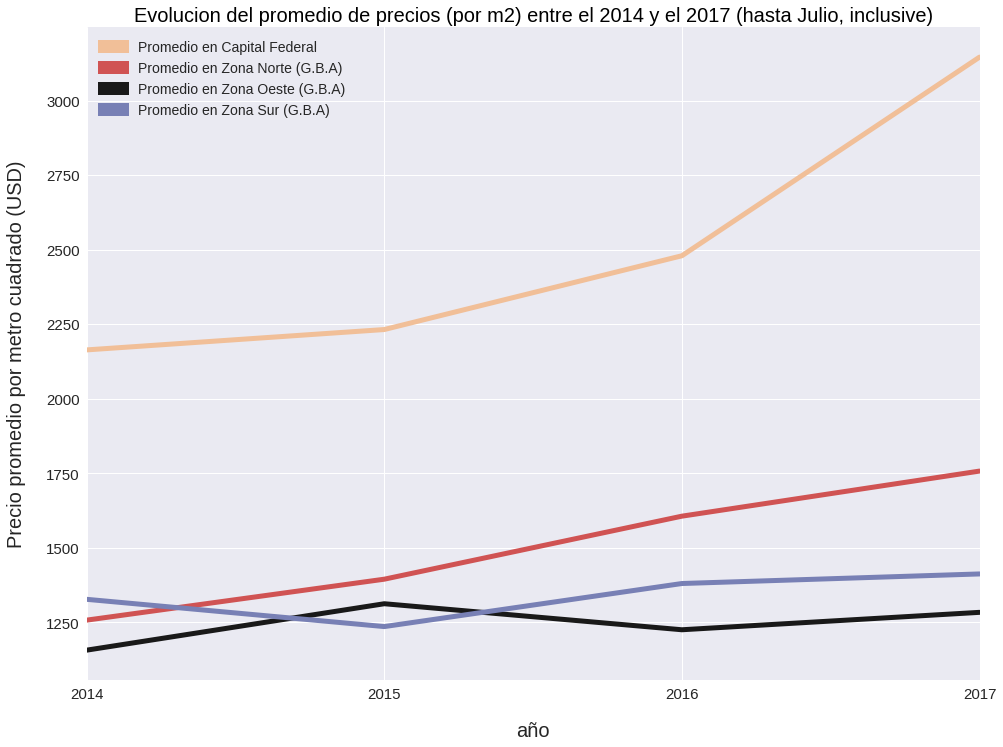

In [51]:
## El eje y de este gráfico no empieza en el 0

grouped_capital = dataset_red.loc[dataset_red.state_name.str.contains('Capital Federal'),\
                    ['año', 'price_usd_per_m2']].groupby('año')['price_usd_per_m2'].\
                    agg([np.mean, np.size])
    
grouped_zn = dataset_red.loc[dataset_red.state_name.str.contains('Norte'),\
                    ['año', 'price_usd_per_m2']].groupby('año')['price_usd_per_m2'].\
                    agg([np.mean, np.size])

grouped_zo = dataset_red.loc[dataset_red.state_name.str.contains('Oeste'),\
                    ['año', 'price_usd_per_m2']].groupby('año')['price_usd_per_m2'].\
                    agg([np.mean, np.size])

grouped_zs = dataset_red.loc[dataset_red.state_name.str.contains('Sur'),\
                    ['año', 'price_usd_per_m2']].groupby('año')['price_usd_per_m2'].\
                    agg([np.mean, np.size])

    
f = plt.figure()
plt.xlabel('anio', size=20.0,labelpad=20.0);
plt.ylabel('Precio promedio por metro cuadrado (USD)',size=20.0,labelpad=20.0)
plt.title('Evolucion del promedio de precios (por m2) entre el 2014 y el 2017 (hasta Julio, inclusive)',\
             color='black',size=20.0)

ax1 = grouped_capital['mean'].plot(linewidth=5.0,figsize=(16,12),color='#F1BF98', ax=f.gca())
ax1_patch=mpatches.Patch(color='#F1BF98', label='Promedio en Capital Federal', lw=3.0)
ax2 = grouped_zn['mean'].plot(linewidth=5.0,figsize=(16,12),color='#D05353', ax=f.gca())
ax2_patch=mpatches.Patch(color='#D05353', label='Promedio en Zona Norte (G.B.A)', lw=3.0)
ax3 = grouped_zo['mean'].plot(linewidth=5.0,figsize=(16,12),color='#191919', ax=f.gca())
ax3_patch=mpatches.Patch(color='#191919', label='Promedio en Zona Oeste (G.B.A)', lw=3.0)
ax4 = grouped_zs['mean'].plot(linewidth=5.0,figsize=(16,12),color='#7880B5', ax=f.gca())
ax4_patch=mpatches.Patch(color='#7880B5', label='Promedio en Zona Sur (G.B.A)', lw=3.0)

plt.legend(handles=[ax1_patch,ax2_patch,ax3_patch,ax4_patch], fontsize=14.0)
plt.xticks(range(2014,2018,1), size=15);
plt.yticks(size = 15)
plt.show()


# Analisis de precio en USD en funcion del barrio

# Top 5  de barrios con precios por propiedad en venta mas caros del segundo semestre del 2014 hasta julio del 2017 inclusive en USD en Capital Federal

In [4]:
top_barrios = dataset.loc[dataset.state_name.str.contains('Capital Federal') & (dataset.place_name.str.contains('Capital Federal') == False) \
                   & (dataset.price_aprox_usd > 0),['place_name', 'price_aprox_usd']]
top_barrios.dropna(inplace=True)
top_barrios = top_barrios.groupby('place_name').agg([np.mean,np.size])
top_barrios = top_barrios.loc[top_barrios[('price_aprox_usd', 'size')]>100,:].sort_values(('price_aprox_usd', 'mean'), ascending = False).head(5)
top_barrios.drop([('price_aprox_usd', 'size')], axis = 1, inplace=True)
top_barrios

,price_aprox_usd
,mean
place_name,
Palermo Chico,977763.291313
Puerto Madero,881928.403260
Retiro,429583.406906
Recoleta,407536.719853
Belgrano,353035.344893


# Promedio de precios en USD en el 1er semestre 2014 segun top 5

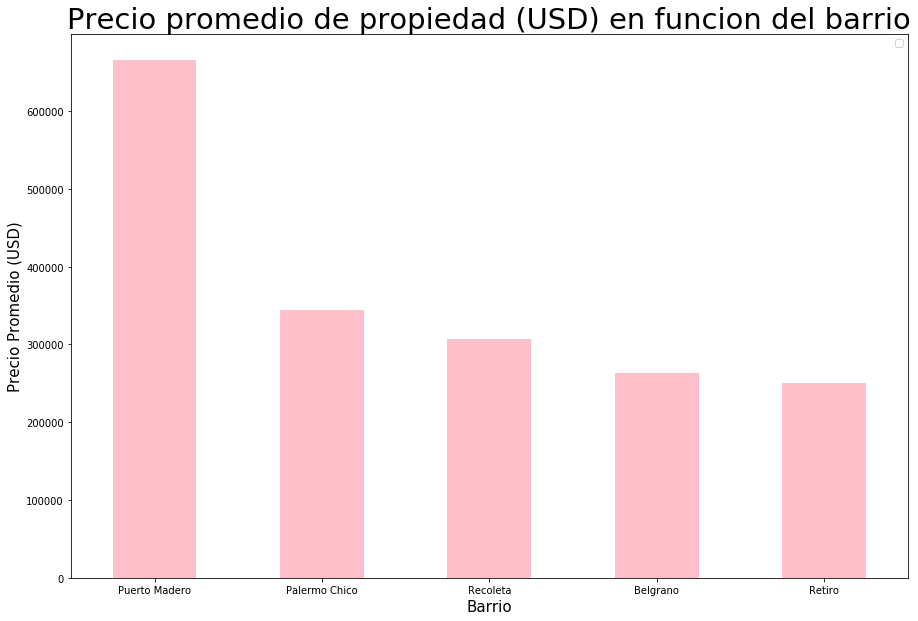

In [21]:
psem_2014_pr = psem_2014.loc[(psem_2014.place_name.str.contains('Palermo Chico') | \
                             psem_2014.place_name.str.contains('Puerto Madero') | \
                             psem_2014.place_name.str.contains('Retiro') | \
                             psem_2014.place_name.str.contains('Recoleta') | \
                             psem_2014.place_name.str.contains('Belgrano') ) \
                            & (psem_2014.price_aprox_usd > 0) \
                             & psem_2014.place_with_parent_names.str.contains('Capital Federal'), \
                             ['place_name', 'price_aprox_usd']]
psem_2014_pr.dropna(inplace=True)
psem_2014_pr = psem_2014_pr.groupby('place_name').agg([np.mean])
psem_2014_pr = psem_2014_pr.sort_values(('price_aprox_usd', 'mean'), ascending = False).head(5)
fig1 = psem_2014_pr.plot(kind='bar', figsize =(15,10), color='pink', rot = 0)
fig1.set_title('Precio promedio de propiedad (USD) en funcion del barrio', size = 29)
fig1.set_xlabel('Barrio', size = 15)
fig1.set_ylabel('Precio Promedio (USD)', size = 15)
fig1.legend('')

# Promedio de precios en USD en el 2do semestre 2014 segun top 5

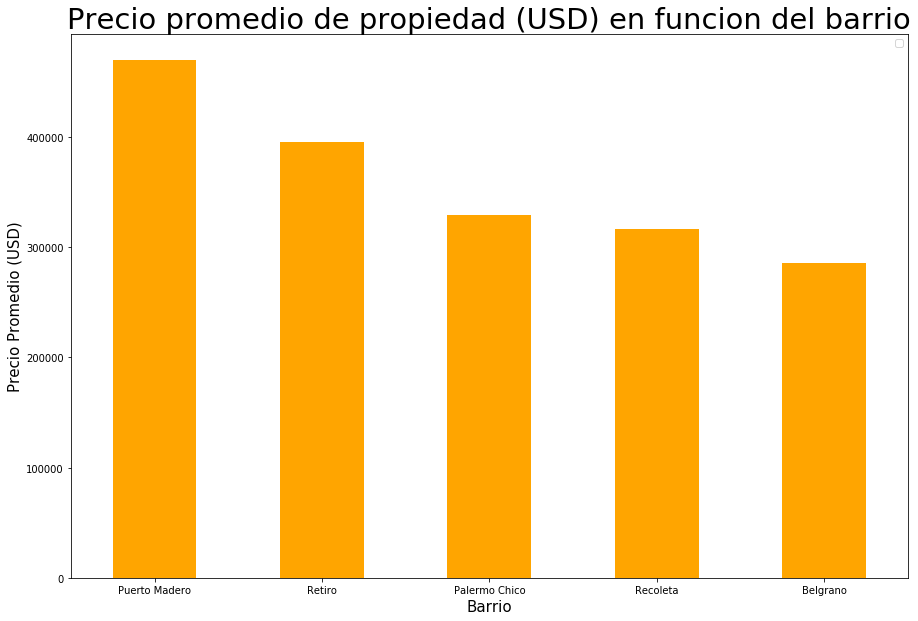

In [22]:
ssem_2014_pr = ssem_2014.loc[(ssem_2014.place_name.str.contains('Palermo Chico') | \
                             ssem_2014.place_name.str.contains('Puerto Madero') | \
                             ssem_2014.place_name.str.contains('Retiro') | \
                             ssem_2014.place_name.str.contains('Recoleta') | \
                             ssem_2014.place_name.str.contains('Belgrano') ) \
                            & (ssem_2014.price_aprox_usd > 0) & ssem_2014.state_name.str.contains('Capital Federal'), \
                             ['place_name', 'price_aprox_usd']]
ssem_2014_pr.dropna(inplace=True)
ssem_2014_pr = ssem_2014_pr.groupby('place_name').agg([np.mean])
ssem_2014_pr = ssem_2014_pr.sort_values(('price_aprox_usd', 'mean'), ascending = False).head(5)
fig1 = ssem_2014_pr.plot(kind='bar', figsize =(15,10), color='orange', rot = 0)
fig1.set_title('Precio promedio de propiedad (USD) en funcion del barrio', size = 29)
fig1.set_xlabel('Barrio', size = 15)
fig1.set_ylabel('Precio Promedio (USD)', size = 15)
fig1.legend('')

# Promedio de precios en USD en el 1er semestre 2015 segun top 5

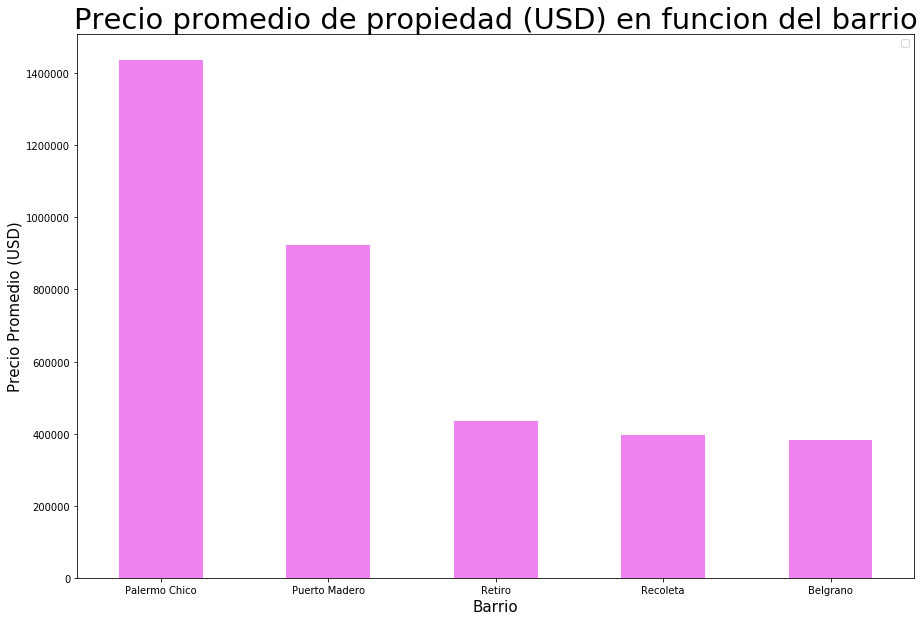

In [23]:
psem_2015_pr = psem_2015.loc[(psem_2015.place_name.str.contains('Palermo Chico') | \
                             psem_2015.place_name.str.contains('Puerto Madero') | \
                             psem_2015.place_name.str.contains('Retiro') | \
                             psem_2015.place_name.str.contains('Recoleta') | \
                             psem_2015.place_name.str.contains('Belgrano') ) \
                             & (psem_2015.price_aprox_usd > 0) & psem_2015.state_name.str.contains('Capital Federal'), \
                             ['place_name', 'price_aprox_usd']]
psem_2015_pr.dropna(inplace=True)
psem_2015_pr = psem_2015_pr.groupby('place_name').agg([np.mean])
psem_2015_pr = psem_2015_pr.sort_values(('price_aprox_usd', 'mean'), ascending = False).head(5)
fig1 = psem_2015_pr.plot(kind='bar', figsize =(15,10), color='violet', rot = 0)
fig1.set_title('Precio promedio de propiedad (USD) en funcion del barrio', size = 29)
fig1.set_xlabel('Barrio', size = 15)
fig1.set_ylabel('Precio Promedio (USD)', size = 15)
fig1.legend('')

# Promedio de precios en USD en el 2do semestre 2015 segun top 5

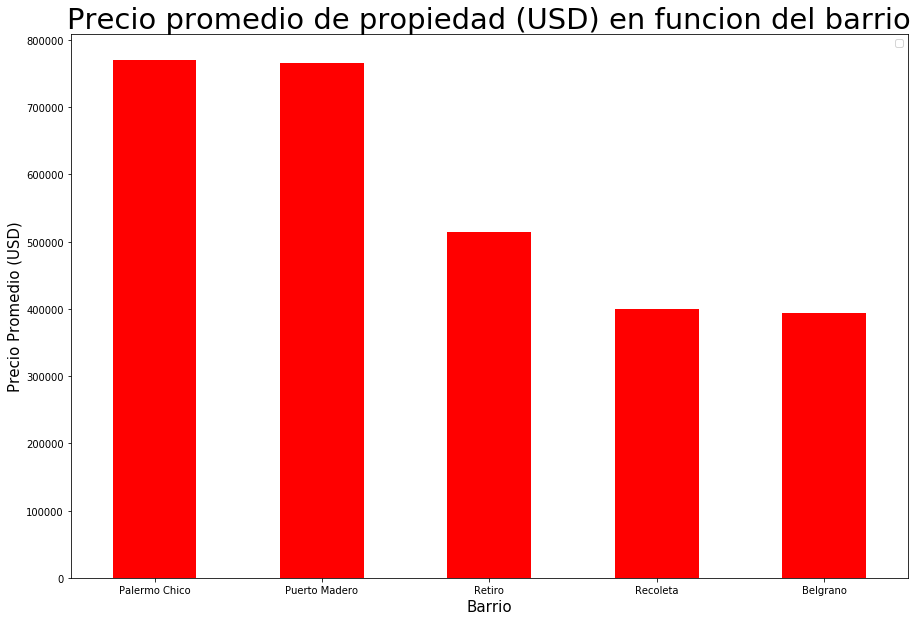

In [24]:
ssem_2015_pr = ssem_2015.loc[(ssem_2015.place_name.str.contains('Palermo Chico') | \
                             ssem_2015.place_name.str.contains('Puerto Madero') | \
                             ssem_2015.place_name.str.contains('Retiro') | \
                             ssem_2015.place_name.str.contains('Recoleta') | \
                             ssem_2015.place_name.str.contains('Belgrano') ) \
                             & (ssem_2015.price_aprox_usd > 0) & ssem_2015.state_name.str.contains('Capital Federal'), \
                             ['place_name', 'price_aprox_usd']]
ssem_2015_pr.dropna(inplace=True)
ssem_2015_pr = ssem_2015_pr.groupby('place_name').agg([np.mean])
ssem_2015_pr = ssem_2015_pr.sort_values(('price_aprox_usd', 'mean'), ascending = False).head(5)
fig1 = ssem_2015_pr.plot(kind='bar', figsize =(15,10), color='r', rot = 0)
fig1.set_title('Precio promedio de propiedad (USD) en funcion del barrio', size = 29)
fig1.set_xlabel('Barrio', size = 15)
fig1.set_ylabel('Precio Promedio (USD)', size = 15)
fig1.legend('')

# Promedio de precios en USD en el 1er semestre 2016 segun top 5

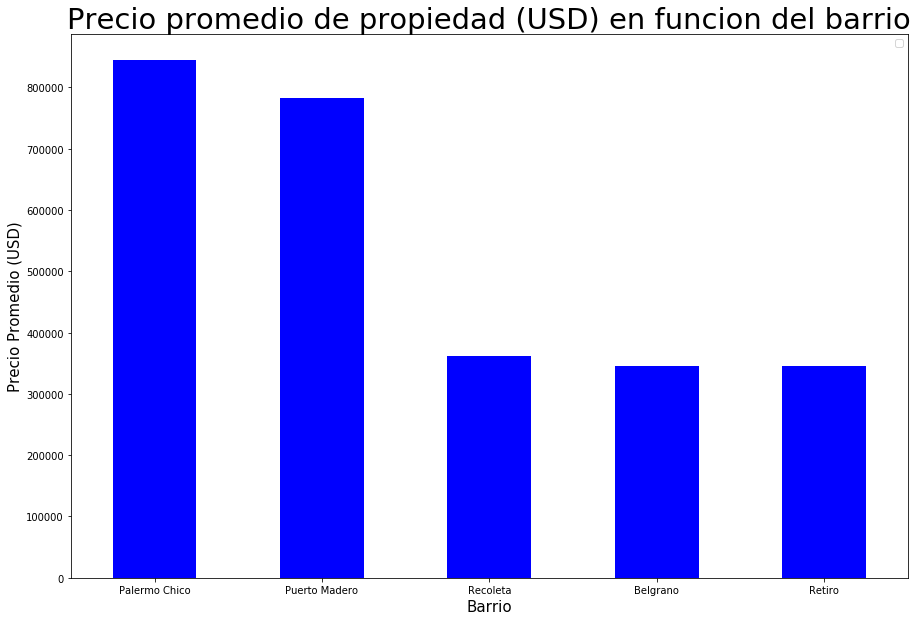

In [25]:
psem_2016_pr = psem_2016.loc[(psem_2016.place_name.str.contains('Palermo Chico') | \
                             psem_2016.place_name.str.contains('Puerto Madero') | \
                             psem_2016.place_name.str.contains('Retiro') | \
                             psem_2016.place_name.str.contains('Recoleta') | \
                             psem_2016.place_name.str.contains('Belgrano') ) \
                             & (psem_2016.price_aprox_usd > 0) & psem_2016.state_name.str.contains('Capital Federal'), \
                             ['place_name', 'price_aprox_usd']]
psem_2016_pr.dropna(inplace=True)
psem_2016_pr = psem_2016_pr.groupby('place_name').agg([np.mean])
psem_2016_pr = psem_2016_pr.sort_values(('price_aprox_usd', 'mean'), ascending = False).head(5)
fig1 = psem_2016_pr.plot(kind='bar', figsize =(15,10), color='b', rot = 0)
fig1.set_title('Precio promedio de propiedad (USD) en funcion del barrio', size = 29)
fig1.set_xlabel('Barrio', size = 15)
fig1.set_ylabel('Precio Promedio (USD)', size = 15)
fig1.legend('')

# Promedio de precios en USD en el 2do semestre 2016 segun top 5

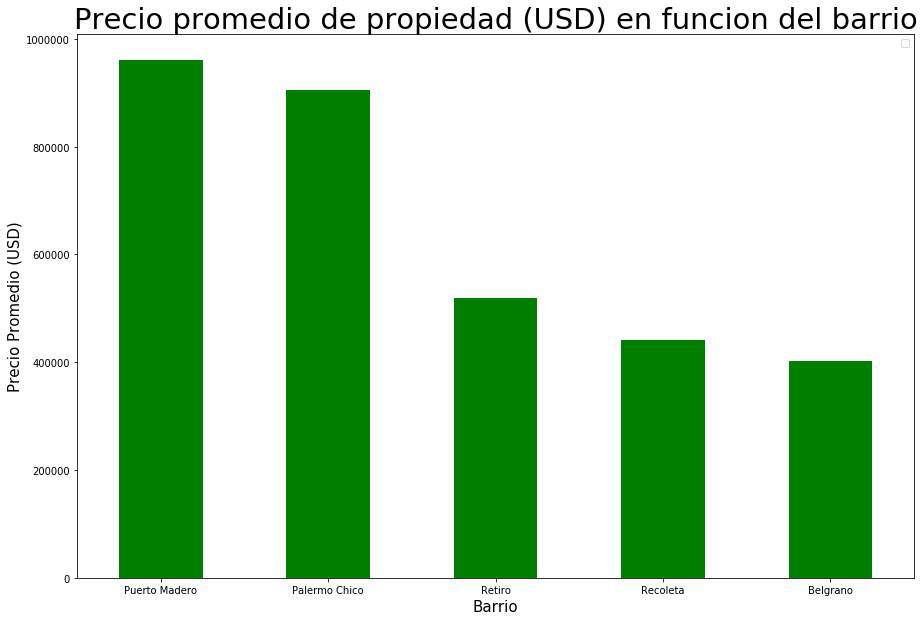

In [26]:
ssem_2016_pr = ssem_2016.loc[(ssem_2016.place_name.str.contains('Palermo Chico') | \
                             ssem_2016.place_name.str.contains('Puerto Madero') | \
                             ssem_2016.place_name.str.contains('Retiro') | \
                             ssem_2016.place_name.str.contains('Recoleta') | \
                             ssem_2016.place_name.str.contains('Belgrano') ) \
                             & (ssem_2016.price_aprox_usd > 0) & ssem_2016.state_name.str.contains('Capital Federal'), \
                             ['place_name', 'price_aprox_usd']]
ssem_2016_pr.dropna(inplace=True)
ssem_2016_pr = ssem_2016_pr.groupby('place_name').agg([np.mean])
ssem_2016_pr = ssem_2016_pr.sort_values(('price_aprox_usd', 'mean'), ascending = False).head(5)
fig1 = ssem_2016_pr.plot(kind='bar', figsize =(15,10), color='g', rot = 0)
fig1.set_title('Precio promedio de propiedad (USD) en funcion del barrio', size = 29)
fig1.set_xlabel('Barrio', size = 15)
fig1.set_ylabel('Precio Promedio (USD)', size = 15)
fig1.legend('')

# Promedio de precios en USD en 2017 (hasta julio) segun top 5

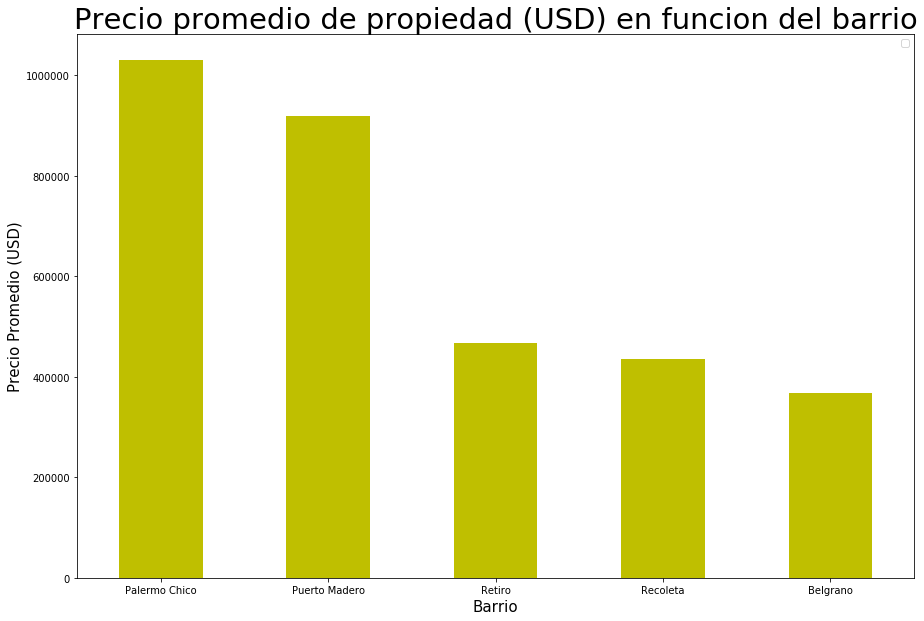

In [27]:
_2017_pr = data_2017.loc[(data_2017.place_name.str.contains('Palermo Chico') | \
                             data_2017.place_name.str.contains('Puerto Madero') | \
                             data_2017.place_name.str.contains('Retiro') | \
                             data_2017.place_name.str.contains('Recoleta') | \
                             data_2017.place_name.str.contains('Belgrano') ) \
                             & (data_2017.price_aprox_usd > 0) & data_2017.state_name.str.contains('Capital Federal'), \
                             ['place_name', 'price_aprox_usd']]
_2017_pr.dropna(inplace=True)
_2017_pr = _2017_pr.groupby('place_name').agg([np.mean])
_2017_pr = _2017_pr.sort_values(('price_aprox_usd', 'mean'), ascending = False).head(5)
fig1 = _2017_pr.plot(kind='bar', figsize =(15,10), color='y', rot = 0)
fig1.set_title('Precio promedio de propiedad (USD) en funcion del barrio', size = 29)
fig1.set_xlabel('Barrio', size = 15)
fig1.set_ylabel('Precio Promedio (USD)', size = 15)
fig1.legend('')

# Precio en funcion del tipo de propiedad en venta

In [29]:
tipo_prop = dataset.loc[dataset.state_name.str.contains('Capital Federal') & (dataset.place_name.str.contains('Capital Federal') == False) \
                   & (dataset.price_aprox_usd > 0),['property_type', 'price_aprox_usd']]
tipo_prop.dropna(inplace=True)
tipo_prop = tipo_prop.groupby('property_type').agg([np.mean]).sort_values(('price_aprox_usd', 'mean') \
                                                                          , ascending = False).head()
tipo_prop

,price_aprox_usd
,mean
property_type,
house,472794.134508
store,450339.057963
apartment,222938.312914
PH,175442.683105


# ¿En que barrio son mas caras las casas, desde el 2014 hasta julio del 2017?

In [30]:
casas_pr = dataset.loc[dataset.state_name.str.contains('Capital Federal') & (dataset.place_name.str.contains('Capital Federal') == False) \
                   & (dataset.property_type.str.contains('house')) \
                   & (dataset.price_aprox_usd > 0),['place_name', 'price_aprox_usd']]
casas_pr.dropna(inplace=True)
casas_pr = casas_pr.groupby('place_name').agg([np.mean,np.size])
casas_pr = casas_pr.loc[casas_pr[('price_aprox_usd', 'size')]>100,:].sort_values(('price_aprox_usd', 'mean'), ascending = False).head(5)
casas_pr.drop([('price_aprox_usd', 'size')], axis = 1, inplace=True)
casas_pr

,price_aprox_usd
,mean
place_name,
Belgrano,1.088002e+06
Palermo,7.924864e+05
Villa Devoto,4.267653e+05
Caballito,4.135204e+05
Villa Urquiza,3.910817e+05


# ¿En que barrio son mas caros los departamentos, desde el 2014 hasta julio del 2017?

In [31]:
deptos_pr = dataset.loc[dataset.state_name.str.contains('Capital Federal') & (dataset.place_name.str.contains('Capital Federal') == False) \
                   & (dataset.property_type.str.contains('apartment')) \
                   & (dataset.price_aprox_usd > 0),['place_name', 'price_aprox_usd']]
deptos_pr.dropna(inplace=True)
deptos_pr = deptos_pr.groupby('place_name').agg([np.mean,np.size])
deptos_pr = deptos_pr.loc[deptos_pr[('price_aprox_usd', 'size')]>100,:].sort_values(('price_aprox_usd', 'mean'), ascending = False).head(5)
deptos_pr.drop([('price_aprox_usd', 'size')], axis = 1, inplace=True)
deptos_pr

,price_aprox_usd
,mean
place_name,
Puerto Madero,878486.281202
Palermo Chico,788957.532966
Recoleta,399116.940509
Retiro,378782.596592
Belgrano,315365.003004


# ¿En que barrio son mas caros los PH, desde el 2014 hasta julio del 2017? 

In [32]:
ph_pr = dataset.loc[dataset.state_name.str.contains('Capital Federal') & (dataset.place_name.str.contains('Capital Federal') == False) \
                   & (dataset.property_type.str.contains('PH')) \
                   & (dataset.price_aprox_usd > 0),['place_name', 'price_aprox_usd']]
ph_pr.dropna(inplace=True)
ph_pr = ph_pr.groupby('place_name').agg([np.mean,np.size])
ph_pr = ph_pr.loc[ph_pr[('price_aprox_usd', 'size')]>100,:].sort_values(('price_aprox_usd', 'mean'), ascending = False).head(5)
ph_pr.drop([('price_aprox_usd', 'size')], axis = 1, inplace=True)
ph_pr

,price_aprox_usd
,mean
place_name,
Palermo,266492.629474
Belgrano,242242.342342
Caballito,202328.638498
Almagro,193667.525773
Villa Crespo,188174.795350


# ¿En que barrio son mas caros los negocios, desde el 2014 hasta julio del 2017?

In [33]:
negocios_pr = dataset.loc[dataset.state_name.str.contains('Capital Federal') & (dataset.place_name.str.contains('Capital Federal') == False) \
                   & (dataset.property_type.str.contains('store')) \
                   & (dataset.price_aprox_usd > 0),['place_name', 'price_aprox_usd']]
negocios_pr.dropna(inplace=True)
negocios_pr = negocios_pr.groupby('place_name').agg([np.mean,np.size])
negocios_pr = negocios_pr.loc[negocios_pr[('price_aprox_usd', 'size')]>50,:].sort_values(('price_aprox_usd', 'mean'), ascending = False).head(5)
negocios_pr.drop([('price_aprox_usd', 'size')], axis = 1, inplace=True)
negocios_pr

,price_aprox_usd
,mean
place_name,
San Nicolás,621405.814568
San Telmo,568618.048642
Recoleta,563532.595000
Palermo,557311.293493
Balvanera,538694.138654


## Seguimos el análisis de los inmuebles de tipo negocio
### Estudiaremos su cantidad y precio promedio en la región más "comercial" que podemos abordar en toda la Argentina: la capital federal

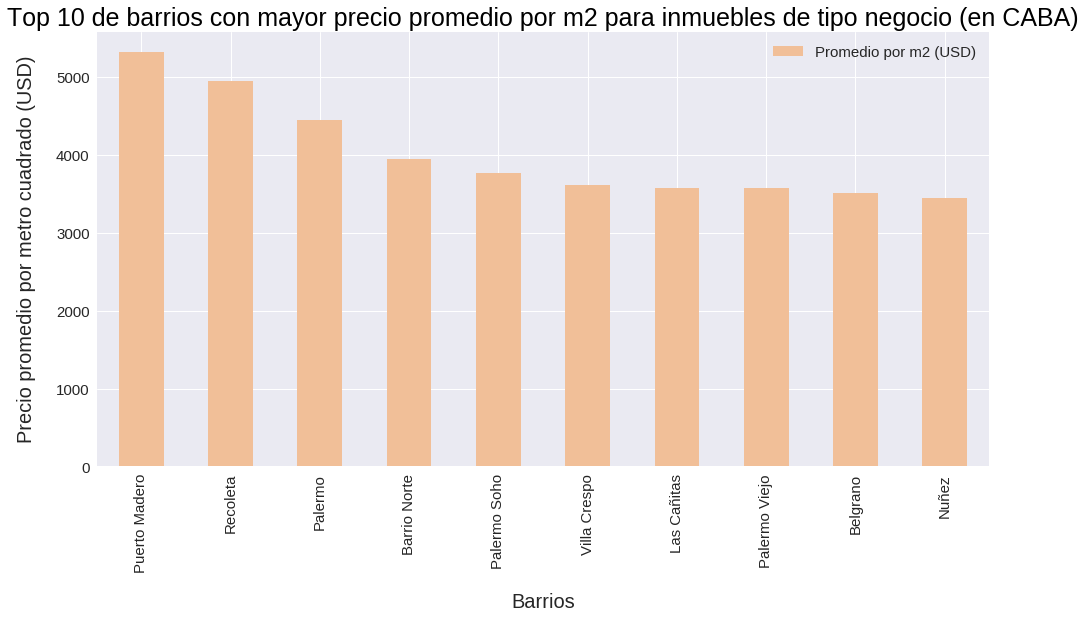

In [79]:
dataset_neg = dataset
dataset_neg.dropna(subset=['property_type', 'place_with_parent_names'], inplace=True)
dataset_neg_capital = dataset_neg.loc[(dataset_neg.place_with_parent_names.str.contains('Capital Federal') & \
                            (dataset_neg.property_type.str.contains('store'))), ['place_name', 'price_usd_per_m2']]
dataset_neg_capital.dropna(inplace = True)
dataset_neg_capital_por_barrio = dataset_neg_capital.groupby('place_name').agg([np.mean, np.size])
dataset_neg_capital_por_barrio.columns=['promedio', 'tamanio']
prom_neg_capital_por_barrio_ordenado \
    = dataset_neg_capital_por_barrio.loc[(dataset_neg_capital_por_barrio.tamanio > 4),:].sort_values('promedio',\
                        ascending=False)

f = plt.figure()
ax = prom_neg_capital_por_barrio_ordenado.head(10).plot(y='promedio', kind='bar', figsize=(16,8), \
                                                             color='#F1BF98', ax=f.gca())
ax.set_title('Top 10 de barrios con mayor precio promedio por m2 para inmuebles de tipo negocio (en CABA)',\
             color='black',size=25.0)
ax.set_xlabel('Barrios',size=20.0,labelpad=20.0);
ax.set_ylabel('Precio promedio por metro cuadrado (USD)',size=20.0,labelpad=20.0)
ax.legend(["Promedio por m2 (USD)"], prop={'size': 15.0});
plt.yticks(size = 15)
plt.xticks(size = 15)
plt.show()

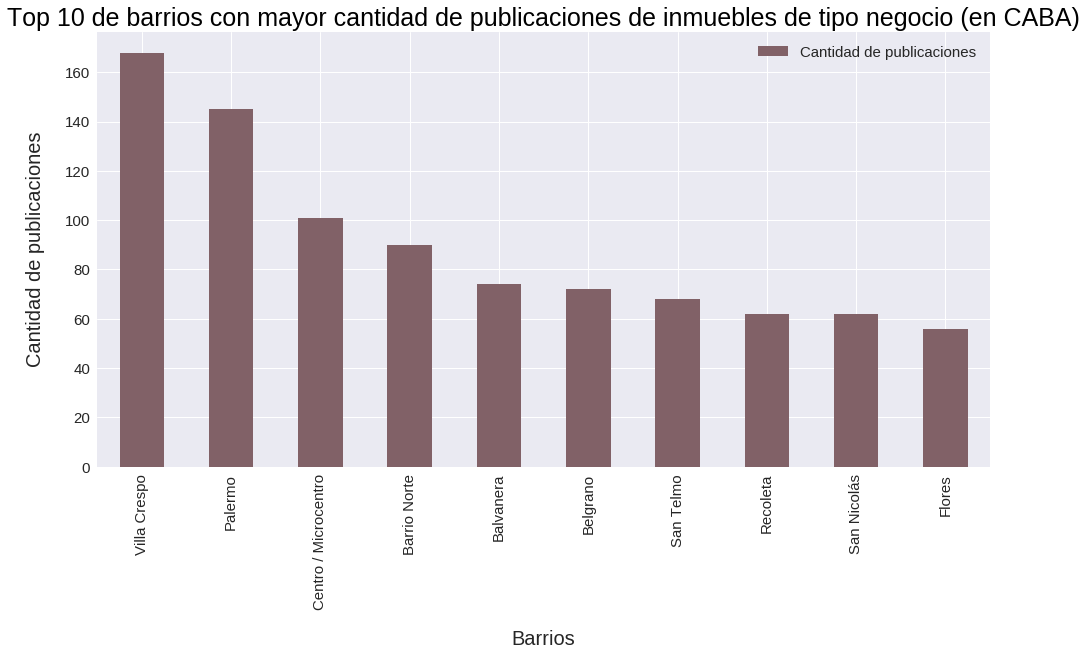

In [82]:
cant_negocios_capital_por_barrio_ordenado = dataset_neg_capital_por_barrio.loc[(dataset_neg_capital_por_barrio.\
                                tamanio > 4),:].sort_values('tamanio', ascending=False)
f = plt.figure()
ax = cant_negocios_capital_por_barrio_ordenado.head(10).plot(y='tamanio', kind='bar', figsize=(16,8),\
                                                     color='#816167', ax=f.gca())
ax.set_title('Top 10 de barrios con mayor cantidad de publicaciones de inmuebles de tipo negocio (en CABA)',\
             color='black',size=25.0)
ax.set_xlabel('Barrios',size=20.0,labelpad=20.0);
ax.set_ylabel('Cantidad de publicaciones',size=20.0,labelpad=20.0)
ax.legend(["Cantidad de publicaciones"], prop={'size': 15.0});
plt.yticks(size = 15)
plt.xticks(size = 15)
plt.show()


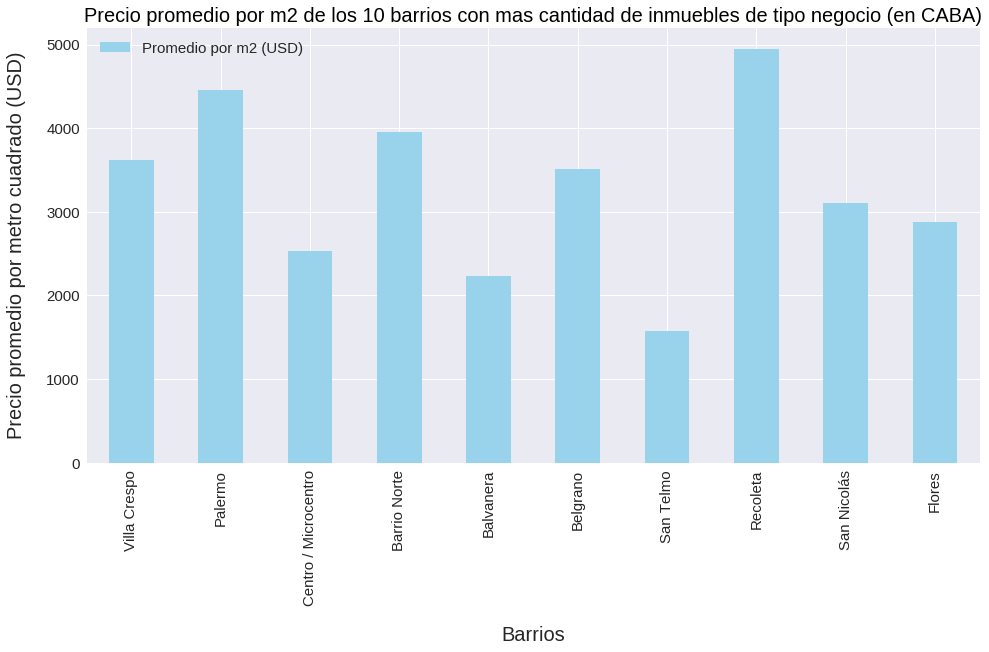

In [84]:
cant_y_promedio_negocios_capital_por_barrio = \
    dataset_neg_capital_por_barrio.loc[(dataset_neg_capital_por_barrio.tamanio > 4),:].sort_values('tamanio',\
                                ascending=False)['promedio']
    
f = plt.figure()
ax = cant_y_promedio_negocios_capital_por_barrio.head(10).plot(y='promedio', kind='bar', figsize=(16,8), \
                                                             color='#98D2EB', ax=f.gca())
ax.set_title('Precio promedio por m2 de los 10 barrios con mas cantidad de inmuebles de tipo negocio (en CABA)',\
             color='black',size=20.0)
ax.set_xlabel('Barrios',size=20.0,labelpad=20.0);
ax.set_ylabel('Precio promedio por metro cuadrado (USD)',size=20.0,labelpad=20.0)
ax.legend(["Promedio por m2 (USD)"], prop={'size': 15.0});
plt.yticks(size = 15)
plt.xticks(size = 15)
plt.show()

# ¿Hay alguna correlación entre la superficie por m2 y el precio por m2?
#### En principio creeríamos que no. El precio por m2 no dependería de la superficie del departamento, sino que son otros los factores que condicionan este promedio

In [52]:
dataset_sup = dataset
dataset_sup.dropna(subset=['surface_total_in_m2', 'price_usd_per_m2'], inplace=True)
dataset_sup = dataset_sup.loc[(dataset_sup.price_usd_per_m2 < 10000) & (dataset_sup.surface_total_in_m2 < 1000),['surface_total_in_m2', 'price_usd_per_m2']]
dataset_sup['price_usd_per_m2'] = dataset_sup['price_usd_per_m2'].apply(lambda x: round(x, 2))
dataset_sup['surface_total_in_m2'] = dataset_sup['surface_total_in_m2'].apply(lambda x: int(x))
dataset_sup.head(10)

,surface_total_in_m2,price_usd_per_m2
12,38,2368.42
13,63,1301.59
15,220,659.09
16,59,1576.27
17,59,1576.27
18,59,1576.27
19,59,1576.27
20,55,1690.91
21,55,1690.91
22,55,1690.91


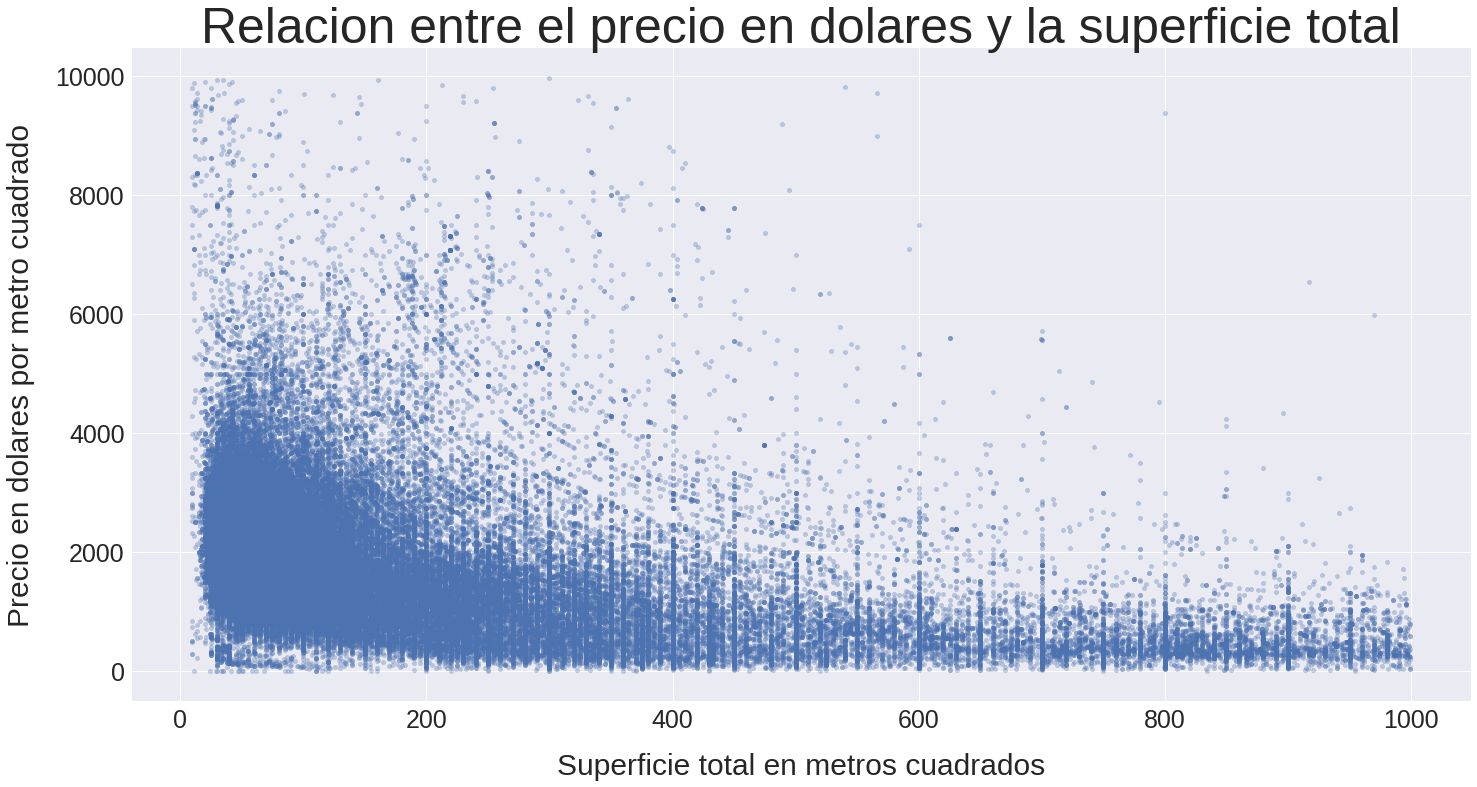

In [74]:
#Para evitar que el gráfico se extienda demasiado y pierda claridad, tomamos aquellos inmuebles con un valor de
#superficie total en metros cuadrados menor a mil metros

f = plt.figure()
ax = dataset_sup.plot.scatter('surface_total_in_m2','price_usd_per_m2',alpha=0.32,figsize=(24,12),ax=f.gca());
ax.set_ylabel('Precio en dolares por metro cuadrado',size=30.0,labelpad=20.0)
ax.set_xlabel('Superficie total en metros cuadrados', size=30.0,labelpad=20.0)
ax.set_title('Relacion entre el precio en dolares y la superficie total', size= 50.0)
plt.yticks(size = 25)
plt.xticks(size = 25)
#ax.legend(["Inmuebles filtrados por precio en USD y superficie en m2"], prop={'size': 20.0})
plt.show()


## ¿Las viviendas que cuentan con cochera son más caras, en promedio, que aquellas que no?
#### Analizamos en Capital Federal

In [94]:
dataset_viviendas = dataset
dataset_viviendas.dropna(subset=['property_type','price_usd_per_m2', 'place_name'], inplace=True)
dataset_viviendas = dataset_red.loc[(~dataset_red.property_type.str.contains('store')),['description','property_type', \
                    'price_usd_per_m2', 'state_name', 'place_name']]
dataset_viviendas.dropna(subset=['description', 'price_usd_per_m2', 'state_name'])

dataset_viviendas_cochera = dataset_viviendas.loc[dataset_viviendas.description.str.contains('garaje|garage|garagge|\
            cochera|estacionamiento', case=False) & (dataset_viviendas.state_name.str.contains('Capital Federal')),\
            ['price_usd_per_m2', 'place_name']].drop_duplicates().reset_index(drop=True)

dataset_viviendas_sin_cochera = dataset_viviendas.loc[(dataset_viviendas.description.str.contains('garaje|cochera|garage|\
    garagge|estacionamiento')==False) & (dataset_viviendas.state_name.str.contains('Capital Federal')),\
    ['description', 'price_usd_per_m2', 'place_name']].drop_duplicates().reset_index(drop=True)

dataset_viviendas_cochera_promedio_por_barrio = dataset_viviendas_cochera.loc[:,['price_usd_per_m2', 'place_name']].groupby('place_name').\
        agg([np.mean,np.size])
dataset_viviendas_cochera_promedio_por_barrio.columns=['promedio_con', 'tamanio_con']
dataset_viviendas_cochera_promedio_por_barrio = dataset_viviendas_cochera_promedio_por_barrio\
    .loc[dataset_viviendas_cochera_promedio_por_barrio.tamanio_con >5 ,:]

dataset_viviendas_sin_cochera_promedio_por_barrio = dataset_viviendas_sin_cochera.loc[:,['price_usd_per_m2', 'place_name']].groupby('place_name').\
        agg([np.mean,np.size])
dataset_viviendas_sin_cochera_promedio_por_barrio.columns=['promedio_sin', 'tamanio_sin']
dataset_viviendas_sin_cochera_promedio_por_barrio = dataset_viviendas_sin_cochera_promedio_por_barrio\
    .loc[dataset_viviendas_sin_cochera_promedio_por_barrio.tamanio_sin >5 ,:]

dataset_join = dataset_viviendas_cochera_promedio_por_barrio.join(dataset_viviendas_sin_cochera_promedio_por_barrio,\
            on=None, how='inner')
dataset_join = dataset_join.drop(['Capital Federal'])
dataset_join.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, Almagro to Villa del Parque
Data columns (total 4 columns):
promedio_con    48 non-null float64
tamanio_con     48 non-null float64
promedio_sin    48 non-null float64
tamanio_sin     48 non-null float64
dtypes: float64(4)
memory usage: 1.9+ KB


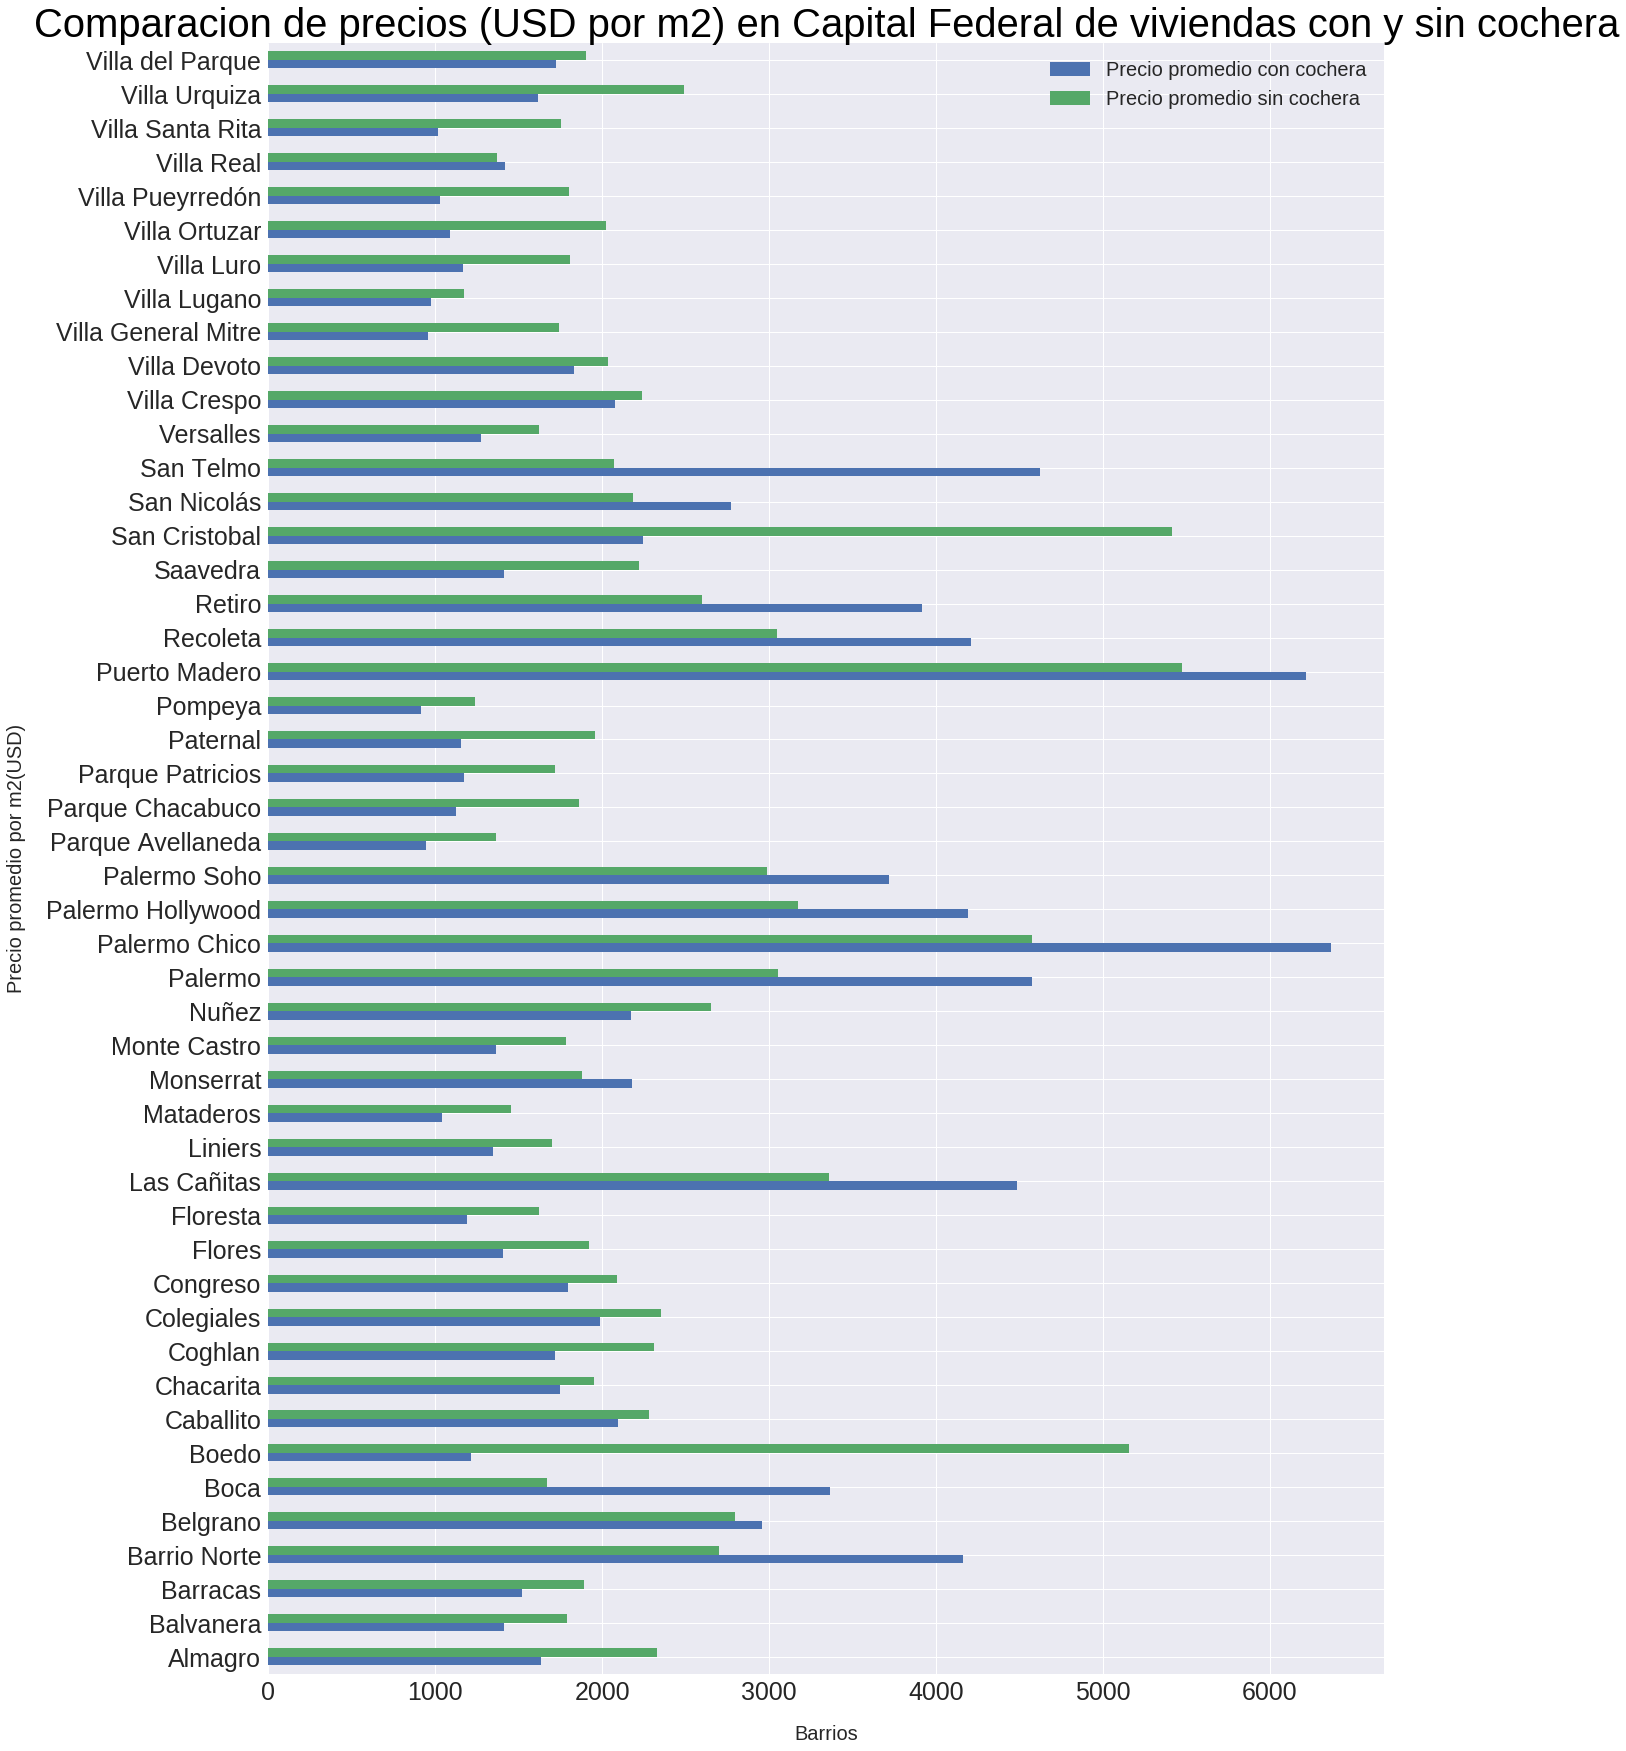

In [95]:
f = plt.figure()
ax = dataset_join.loc[:,['promedio_con', 'promedio_sin']].plot(kind='barh',figsize=(20,30), ax=f.gca())
ax.set_title('Comparacion de precios (USD por m2) en Capital Federal de viviendas con y sin cochera',\
             color='black',size=40.0)
ax.set_xlabel('Barrios',size=20.0,labelpad=20.0);
ax.set_ylabel('Precio promedio por m2(USD)', size=20.0,labelpad=20.0)
plt.yticks(size = 25)
plt.xticks(size = 25)
plt.legend(["Precio promedio con cochera", "Precio promedio sin cochera"], prop={'size': 20.0})
plt.show()

## ¿Las viviendas que cuentan con pileta son más caras, en promedio, que aquellas que no?
#### Analizamos en Capital Federal

In [96]:
data_viviendas = dataset
data_viviendas.dropna(subset=['property_type','price_usd_per_m2', 'place_name'], inplace=True)
data_viviendas = data_viviendas.loc[(~data_viviendas.property_type.str.contains('store')),['description','property_type', \
                    'price_usd_per_m2', 'state_name', 'place_name']]
data_viviendas.dropna(subset=['description', 'price_usd_per_m2', 'state_name'])

data_viviendas_pileta = data_viviendas.loc[data_viviendas.description.str.contains('pileta|piscina', case=False) \
                        & (data_viviendas.state_name.str.contains('Capital Federal')), ['price_usd_per_m2',\
                        'place_name']].drop_duplicates().reset_index(drop=True)

data_viviendas_sin_pileta = data_viviendas.loc[(data_viviendas.description.str.contains('pileta|piscina')==False)\
                        & (data_viviendas.state_name.str.contains('Capital Federal')), ['description', \
                        'price_usd_per_m2', 'place_name']].drop_duplicates().reset_index(drop=True)

data_viviendas_pileta_promedio_por_barrio = data_viviendas_pileta.loc[:,['price_usd_per_m2', 'place_name']].groupby('place_name').\
        agg([np.mean,np.size])
data_viviendas_pileta_promedio_por_barrio.columns=['promedio_con', 'tamanio_con']
data_viviendas_pileta_promedio_por_barrio = data_viviendas_pileta_promedio_por_barrio\
    .loc[data_viviendas_pileta_promedio_por_barrio.tamanio_con >5 ,:]

data_viviendas_sin_pileta_promedio_por_barrio = data_viviendas_sin_pileta.loc[:,['price_usd_per_m2', 'place_name']].groupby('place_name').\
        agg([np.mean,np.size])
data_viviendas_sin_pileta_promedio_por_barrio.columns=['promedio_sin', 'tamanio_sin']
data_viviendas_sin_pileta_promedio_por_barrio = data_viviendas_sin_pileta_promedio_por_barrio\
    .loc[data_viviendas_sin_pileta_promedio_por_barrio.tamanio_sin >5 ,:]

data_join = data_viviendas_pileta_promedio_por_barrio.join(data_viviendas_sin_pileta_promedio_por_barrio,\
            on=None, how='inner')
data_join = data_join.drop(['Capital Federal'])
data_join.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54 entries, Abasto to Villa del Parque
Data columns (total 4 columns):
promedio_con    54 non-null float64
tamanio_con     54 non-null float64
promedio_sin    54 non-null float64
tamanio_sin     54 non-null float64
dtypes: float64(4)
memory usage: 2.1+ KB


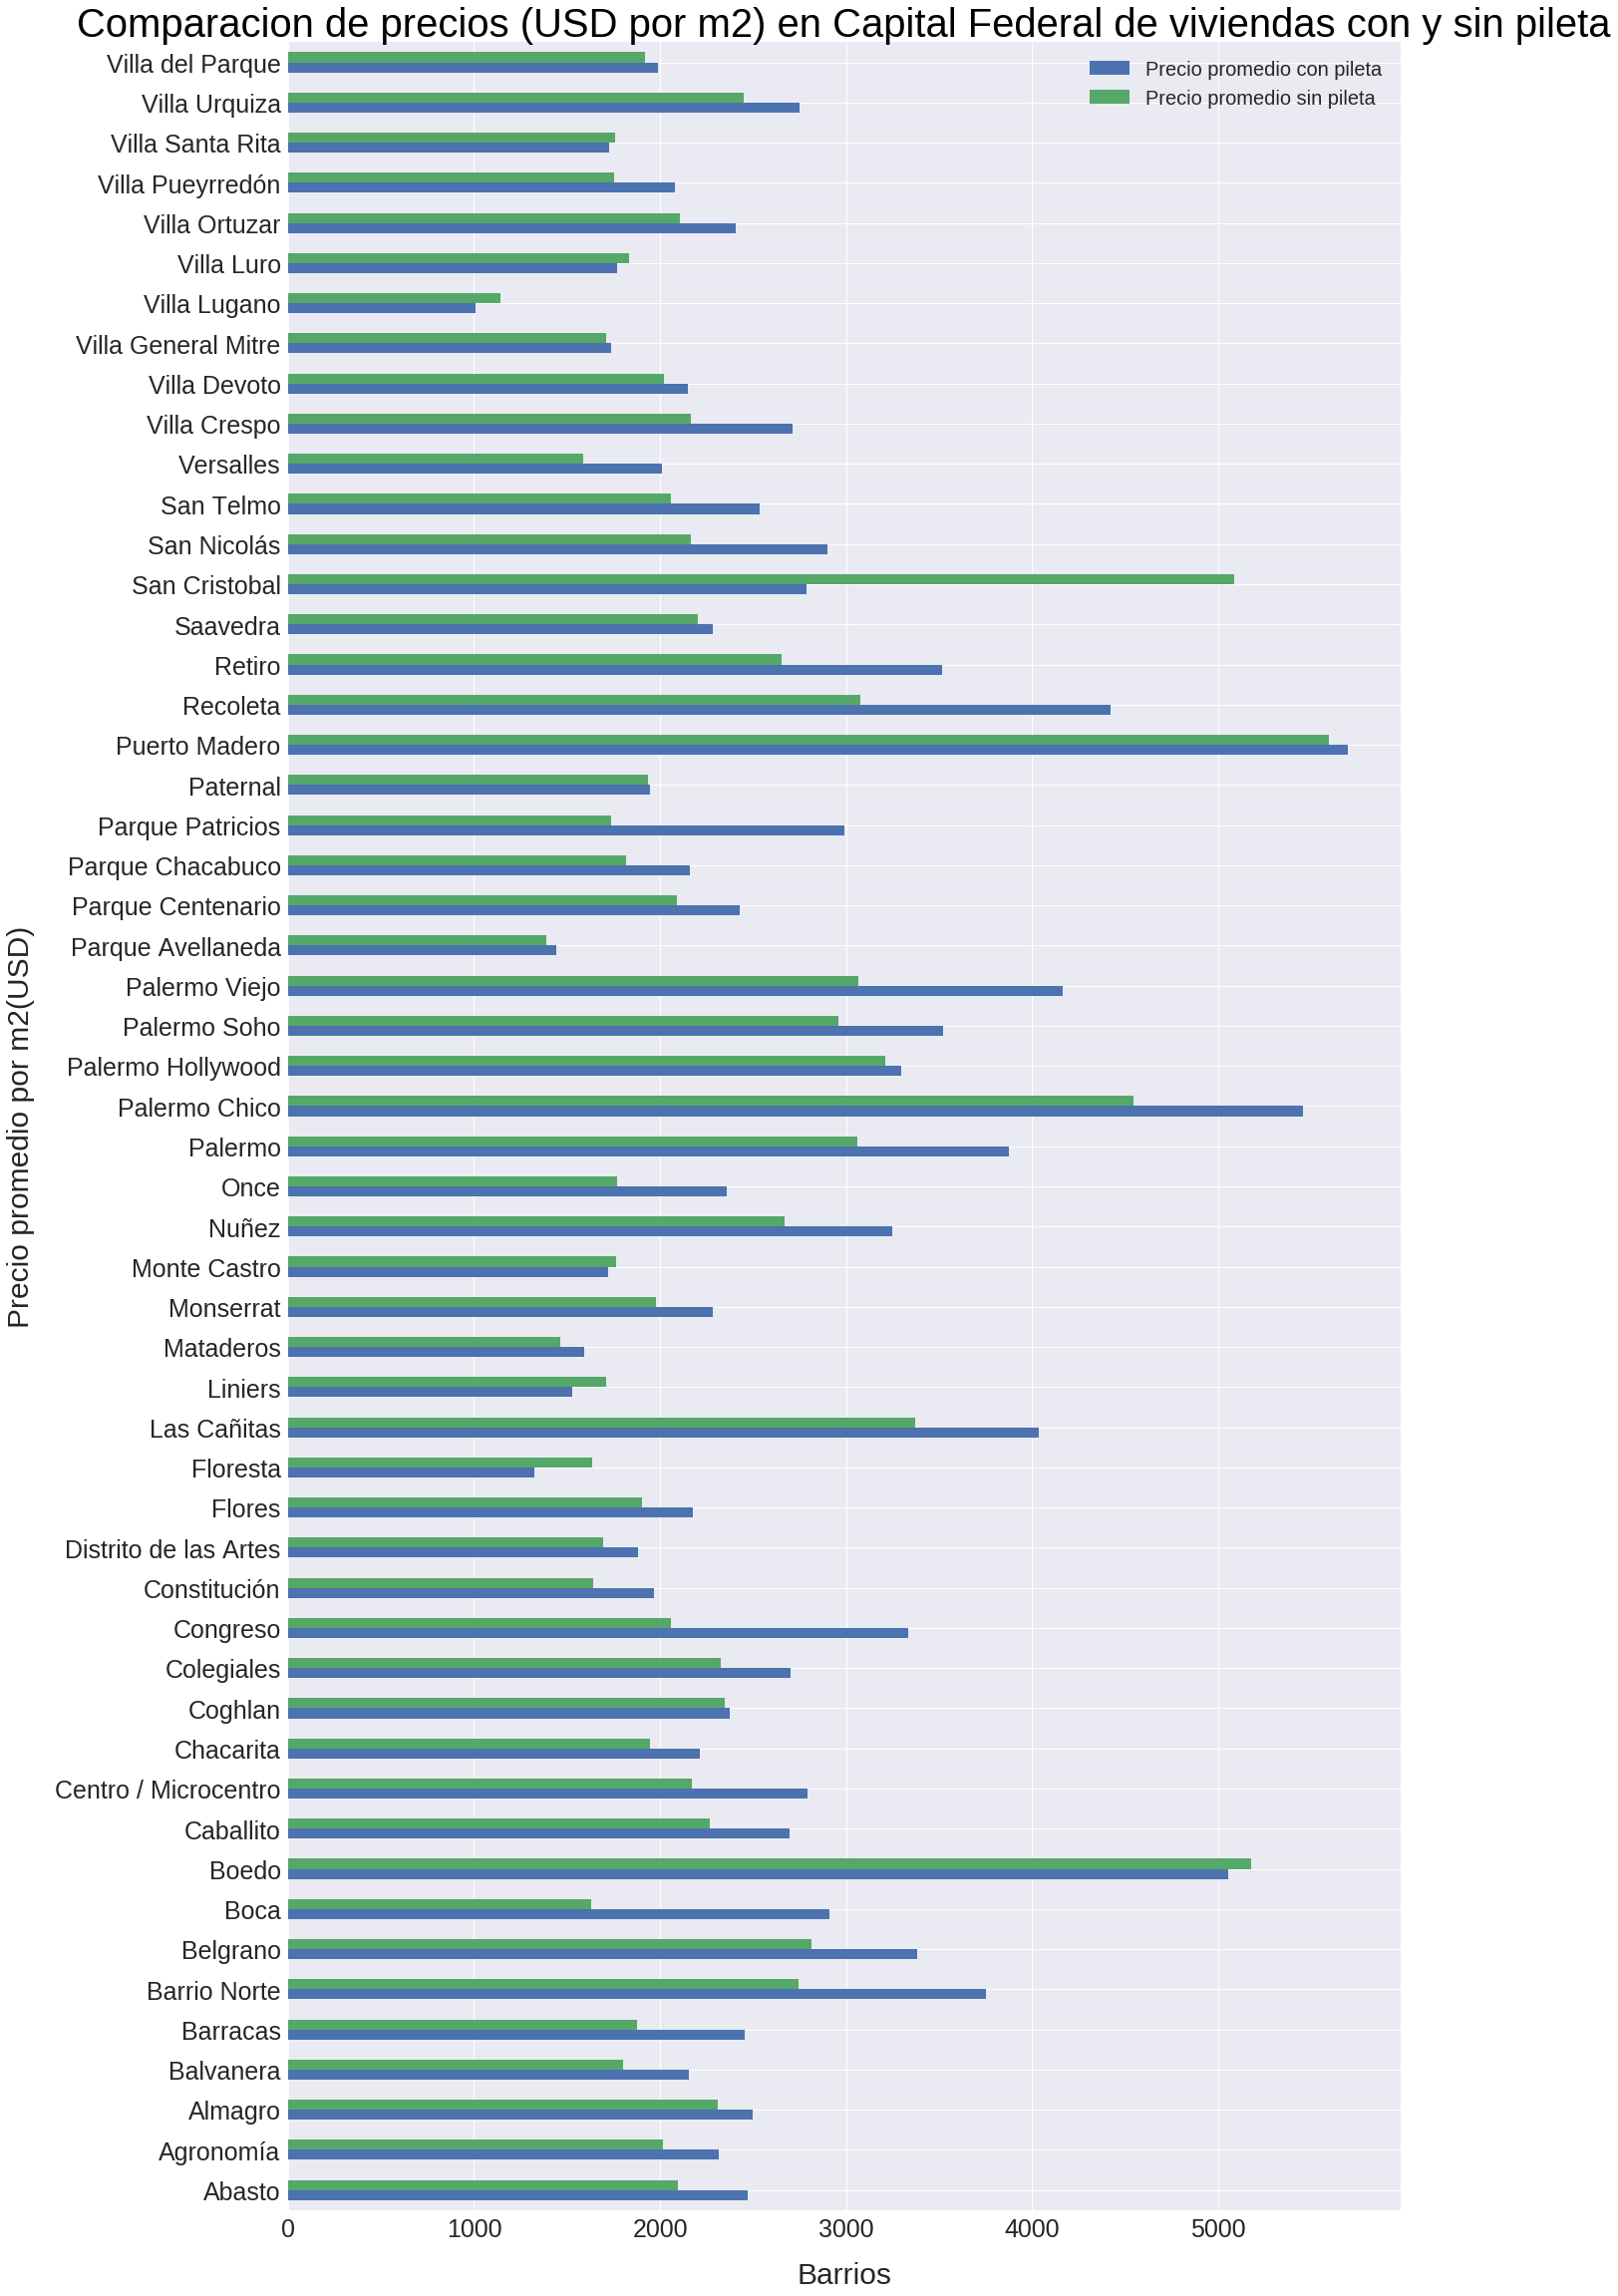

In [99]:
f = plt.figure()
ax = data_join.loc[:,['promedio_con', 'promedio_sin']].plot(kind='barh',figsize=(20,40), ax=f.gca())
ax.set_title('Comparacion de precios (USD por m2) en Capital Federal de viviendas con y sin pileta',\
             color='black',size=40.0)
ax.set_xlabel('Barrios',size=30.0,labelpad=20.0);
ax.set_ylabel('Precio promedio por m2(USD)', size=30.0,labelpad=20.0)
plt.legend(["Precio promedio con pileta", "Precio promedio sin pileta"], prop={'size': 20.0})
plt.yticks(size = 25)
plt.xticks(size = 25)
plt.show()